In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_delivery.csv')
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
## Since the Order_ID is not important remove it
df.drop(['Order_ID'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        43739 non-null  int64  
 1   Agent_Rating     43685 non-null  float64
 2   Store_Latitude   43739 non-null  float64
 3   Store_Longitude  43739 non-null  float64
 4   Drop_Latitude    43739 non-null  float64
 5   Drop_Longitude   43739 non-null  float64
 6   Order_Date       43739 non-null  object 
 7   Order_Time       43739 non-null  object 
 8   Pickup_Time      43739 non-null  object 
 9   Weather          43648 non-null  object 
 10  Traffic          43739 non-null  object 
 11  Vehicle          43739 non-null  object 
 12  Area             43739 non-null  object 
 13  Delivery_Time    43739 non-null  int64  
 14  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.0+ MB


In [5]:
df.isna().sum()

Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [6]:
## Replace the null value with the mean and mode 
df = df.dropna(subset=['Agent_Rating', 'Weather'])



In [7]:
df[df.isna().any(axis=1)]

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category


In [8]:
def valueinColumns(col):
    print(col)
    print(df[col].unique())
    print('-'*75)

cols = ['Weather','Traffic','Vehicle','Area','Category']
for i in range(len(cols)):
    valueinColumns(cols[i])

Weather
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
---------------------------------------------------------------------------
Traffic
['High ' 'Jam ' 'Low ' 'Medium ']
---------------------------------------------------------------------------
Vehicle
['motorcycle ' 'scooter ' 'van']
---------------------------------------------------------------------------
Area
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']
---------------------------------------------------------------------------
Category
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']
---------------------------------------------------------------------------


In [9]:
## since we see that some value in the colum have an extraspace we have to remove them and also remove the NaN from the the Traffice use mode to replace it
def stripcolumns(col):
    df[col]=df[col].str.strip()

cols = ['Weather','Traffic','Vehicle','Area']
for i in range(len(cols)):
    stripcolumns(cols[i])

In [10]:

cols = ['Weather','Traffic','Vehicle','Area','Category']
for i in range(len(cols)):
    valueinColumns(cols[i])

Weather
['Sunny' 'Stormy' 'Sandstorms' 'Cloudy' 'Fog' 'Windy']
---------------------------------------------------------------------------
Traffic
['High' 'Jam' 'Low' 'Medium']
---------------------------------------------------------------------------
Vehicle
['motorcycle' 'scooter' 'van']
---------------------------------------------------------------------------
Area
['Urban' 'Metropolitian' 'Semi-Urban' 'Other']
---------------------------------------------------------------------------
Category
['Clothing' 'Electronics' 'Sports' 'Cosmetics' 'Toys' 'Snacks' 'Shoes'
 'Apparel' 'Jewelry' 'Outdoors' 'Grocery' 'Books' 'Kitchen' 'Home'
 'Pet Supplies' 'Skincare']
---------------------------------------------------------------------------


In [11]:
df.groupby('Vehicle')['Vehicle'].value_counts()

Vehicle
motorcycle    25486
scooter       14590
van            3518
Name: count, dtype: int64

In [12]:
df = df[df['Vehicle'] != 'van'].reset_index(drop=True)


In [13]:
import haversine as hs   
from haversine import Unit

df['Distance_KM'] = df.apply(lambda row: hs.haversine((row['Store_Latitude'], row['Store_Longitude']),
                                                     (row['Drop_Latitude'], row['Drop_Longitude']),
                                                     unit=Unit.KILOMETERS), axis=1)
df

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_KM
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025153
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183558
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552760
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790412
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40071,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,High,motorcycle,Metropolitian,160,Home,1.489848
40072,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,Jam,motorcycle,Metropolitian,180,Jewelry,11.007750
40073,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,Low,scooter,Metropolitian,80,Home,4.657202
40074,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,High,motorcycle,Metropolitian,130,Kitchen,6.232402


In [14]:
df['speed']= df['Distance_KM']/(df['Delivery_Time']/60)

In [15]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_KM,speed
count,40076.000000,40076.000000,40076.000000,40076.000000,40076.000000,40076.000000,40076.000000,40076.000000,40076.000000
mean,29.547335,4.634038,17.278233,70.862482,17.493446,70.926074,125.686820,26.582469,16.486649
std,5.760141,0.313846,7.672190,20.992283,7.322509,20.992427,52.216361,298.378544,238.532257
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,10.000000,1.465069,0.339203
25%,25.000000,4.500000,12.934179,73.170937,12.989934,73.294798,90.000000,4.663426,2.626504
50%,30.000000,4.700000,18.554382,75.898497,18.639156,76.002574,125.000000,9.220386,4.311665
75%,35.000000,4.900000,22.732225,78.045359,22.788060,78.105359,160.000000,13.682184,6.797305
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,270.000000,6884.735909,22514.782297


In [16]:
#### we can remove the row which have distanec more than the 99% quantile 
quantile_90 = df['Distance_KM'].quantile(0.90)
quantile_10 = df['Distance_KM'].quantile(0.10)

# Remove rows where the distance is above the 99th percentile
df = df[(df['Distance_KM'] <= quantile_90) & (df['Distance_KM'] >= quantile_10)].reset_index(drop=True)


In [17]:
quantile_90_time = df['Delivery_Time'].quantile(0.90)
quantile_10_time = df['Delivery_Time'].quantile(0.10)

# Remove rows where the distance is above the 99th percentile
df = df[(df['Delivery_Time'] <= quantile_90_time)&(df['Delivery_Time'] >= quantile_10_time)].reset_index(drop=True)
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_KM,speed
count,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000,26010.000000
mean,29.414264,4.649396,17.217401,70.738547,17.277640,70.798786,125.320646,9.223845,4.691215
std,5.768062,0.297548,7.232387,21.142710,7.233791,21.142951,35.202231,4.219964,2.488303
min,20.000000,2.500000,0.000000,0.000000,0.020000,0.020000,60.000000,2.984603,0.930815
25%,24.000000,4.600000,12.934179,73.170000,12.986229,73.245081,95.000000,6.049766,2.796405
50%,29.000000,4.700000,18.546947,75.898497,18.613626,75.991991,125.000000,9.087978,4.236268
75%,34.000000,4.900000,22.725748,78.042990,22.762634,78.097905,150.000000,12.294183,6.036372
max,39.000000,5.000000,30.914057,88.433452,31.044057,88.543452,195.000000,19.362569,17.855869


In [18]:
quantile_10_speed = df['speed'].quantile(0.10)
quantile_90_speed = df['speed'].quantile(0.90)

# Remove rows where the distance is above the 99th percentile
df = df[(df['speed'] >= quantile_10_speed)&(df['speed'] <= quantile_90_speed)].reset_index(drop=True)
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Distance_KM,speed
count,20808.000000,20808.000000,20808.000000,20808.000000,20808.000000,20808.000000,20808.000000,20808.000000,20808.000000
mean,29.466071,4.643257,17.246571,70.630476,17.306999,70.690904,128.072857,9.252893,4.417410
std,5.765762,0.309264,7.275025,21.288481,7.276210,21.289044,34.976990,3.720267,1.587090
min,20.000000,2.500000,0.000000,0.000000,0.020000,0.020000,60.000000,2.984603,1.944827
25%,24.000000,4.600000,12.934179,73.169083,12.991702,73.239042,100.000000,6.180891,3.116129
50%,29.000000,4.700000,18.551440,75.897429,18.616719,75.976959,130.000000,9.088024,4.236268
75%,35.000000,4.900000,22.725835,78.040267,22.772225,78.088348,155.000000,12.116964,5.607494
max,39.000000,5.000000,30.914057,88.433452,31.044057,88.543452,195.000000,19.362569,7.985113


## EDA

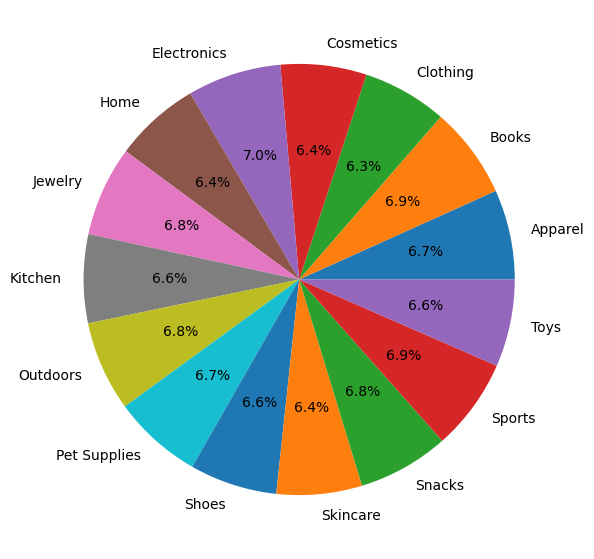

In [19]:
## How much different item order
groupedby_category = df.groupby(['Category'])['Category'].value_counts().reset_index()

plt.figure(figsize=(12,7))
plt.pie((groupedby_category['count']/len(df))*100,labels=groupedby_category['Category'],autopct='%1.1f%%')
plt.show()

##### We clearly see that all the item are equally important as the difference of percentage are not so high

In [20]:
## Now we see that how much time is taken to deliver the order with different vehicle
groupedby_vehicle = df.groupby('Vehicle')[['Vehicle', 'speed', 'Weather', 'Traffic','Area']].apply(lambda x: x).reset_index(drop=True)
groupedby_vehicle

,Vehicle,speed,Weather,Traffic,Area
0,motorcycle,4.451664,Sunny,Medium,Metropolitian
1,motorcycle,2.127864,Cloudy,Jam,Urban
2,motorcycle,3.256866,Stormy,High,Metropolitian
3,motorcycle,3.632465,Windy,Jam,Urban
4,motorcycle,4.085364,Sandstorms,Jam,Metropolitian
...,...,...,...,...,...
20803,scooter,3.460715,Fog,Jam,Metropolitian
20804,scooter,7.652881,Stormy,Low,Metropolitian
20805,scooter,3.494524,Stormy,Medium,Metropolitian
20806,scooter,3.492901,Cloudy,Low,Metropolitian


In [21]:
## Checking the delivery time with respect to vehicle type in different condion of like Weather,Area and traffic

def plot_mean_delivery_time(df, hue):
    """
    Plots a bar plot of mean delivery time with respect to vehicle type with the specified hue.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    hue (str): The column to be used as hue in the bar plot. It should be one of 'Traffic', 'Weather', or 'Area'.
    """
    
    # Calculate mean delivery time grouped by vehicle and hue
    mean_delivery_time = df.groupby(['Vehicle', hue])['speed'].mean().reset_index()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=mean_delivery_time, x='Vehicle', y='speed', hue=hue, errorbar=None)
    plt.title(f'Mean Delivery Speed by Vehicle Type with {hue} as Hue')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Mean Delivery Speed by Vehicle Type')
    plt.legend(title=hue)
    plt.show()

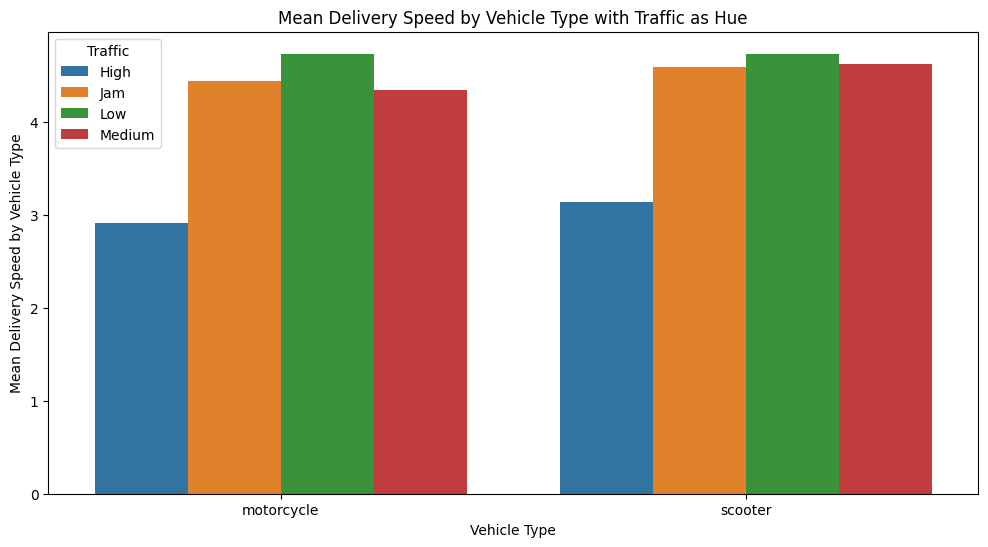

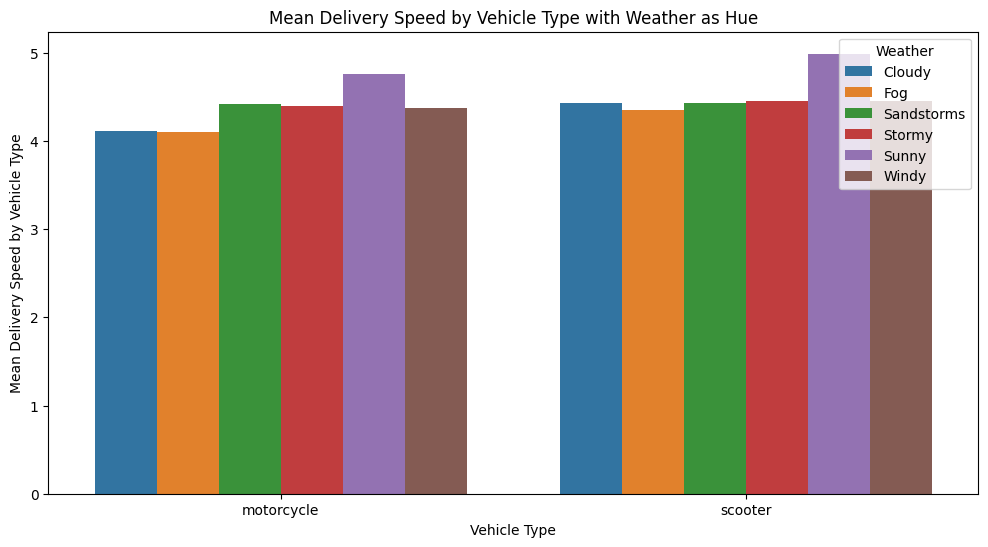

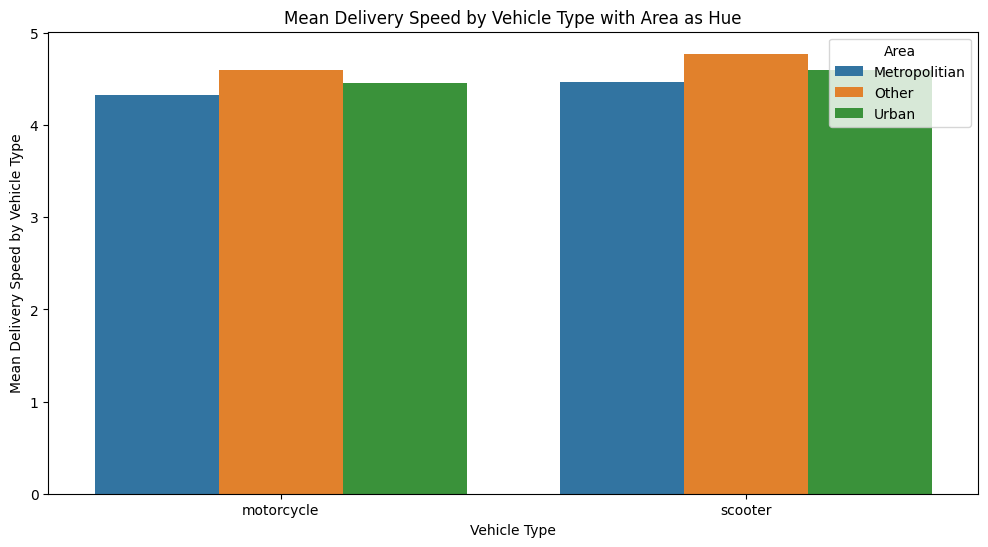

In [22]:
plot_mean_delivery_time(df, 'Traffic')
plot_mean_delivery_time(df, 'Weather')
plot_mean_delivery_time(df, 'Area')

### From the graph we see that scooter and van are the best option in any condition so company may provide more scooter or van to their sales-man

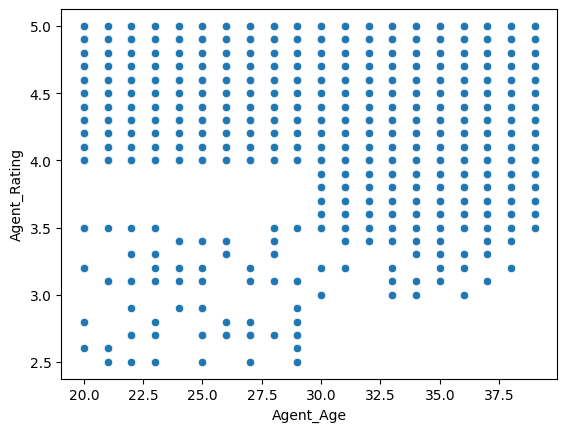

In [23]:
sns.scatterplot(x='Agent_Age',y='Agent_Rating',data=df)
plt.show()

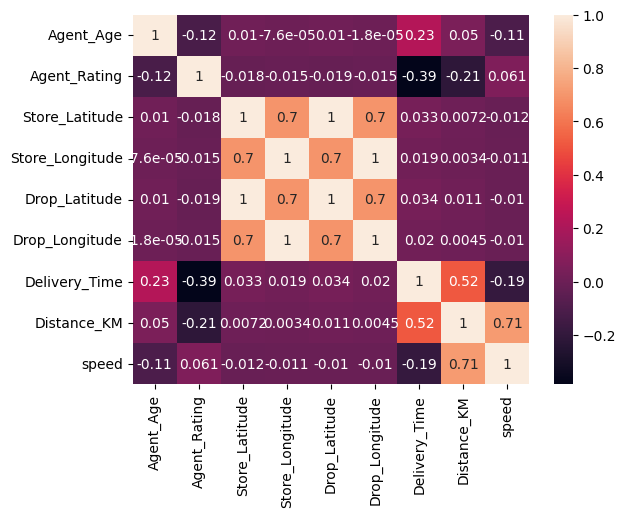

In [24]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True)
plt.show()

In [25]:
df.select_dtypes(include=[np.number]).corr()['speed']

Agent_Age         -0.109125
Agent_Rating       0.061308
Store_Latitude    -0.012496
Store_Longitude   -0.011132
Drop_Latitude     -0.010116
Drop_Longitude    -0.010319
Delivery_Time     -0.190540
Distance_KM        0.713157
speed              1.000000
Name: speed, dtype: float64

In [26]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude',
       'Drop_Latitude', 'Drop_Longitude', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'Distance_KM', 'speed'],
      dtype='object')

In [27]:
df_copy=df.copy()

In [28]:
grouped_vehicle = df_copy.groupby('Vehicle')['speed'].mean()
grouped_weather = df_copy.groupby('Weather')['speed'].mean()
grouped_traffic = df_copy.groupby('Traffic')['speed'].mean()
grouped_area = df_copy.groupby('Area')['speed'].mean()
print(grouped_vehicle)
print(grouped_weather)
print(grouped_traffic)
print(grouped_area)

Vehicle
motorcycle    4.361702
scooter       4.509215
Name: speed, dtype: float64
Weather
Cloudy        4.240577
Fog           4.201100
Sandstorms    4.424396
Stormy        4.421865
Sunny         4.839828
Windy         4.399191
Name: speed, dtype: float64
Traffic
High      3.003809
Jam       4.502457
Low       4.732986
Medium    4.451849
Name: speed, dtype: float64
Area
Metropolitian    4.382178
Other            4.672831
Urban            4.512134
Name: speed, dtype: float64


## Model Training

In [29]:
train = df[['Agent_Age','Agent_Rating','Distance_KM','Weather', 'Traffic', 'Vehicle', 'Area']]
test = df['speed']
train.shape,test.shape

((20808, 7), (20808,))

In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn import tree

In [31]:
cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['Weather', 'Traffic', 'Vehicle', 'Area'])
],remainder='passthrough',force_int_remainder_cols=False)

                    Feature  Importance
17   remainder__Distance_KM    0.583501
16  remainder__Agent_Rating    0.096551
15     remainder__Agent_Age    0.095080
8          trf__Traffic_Low    0.041107
4        trf__Weather_Sunny    0.032689
6         trf__Traffic_High    0.029207
1          trf__Weather_Fog    0.023679
0       trf__Weather_Cloudy    0.023349
11     trf__Vehicle_scooter    0.011419
10  trf__Vehicle_motorcycle    0.011084
12  trf__Area_Metropolitian    0.007861
9       trf__Traffic_Medium    0.007752
7          trf__Traffic_Jam    0.007381
2   trf__Weather_Sandstorms    0.006948
3       trf__Weather_Stormy    0.006909
5        trf__Weather_Windy    0.006773
14          trf__Area_Urban    0.006347
13          trf__Area_Other    0.002364


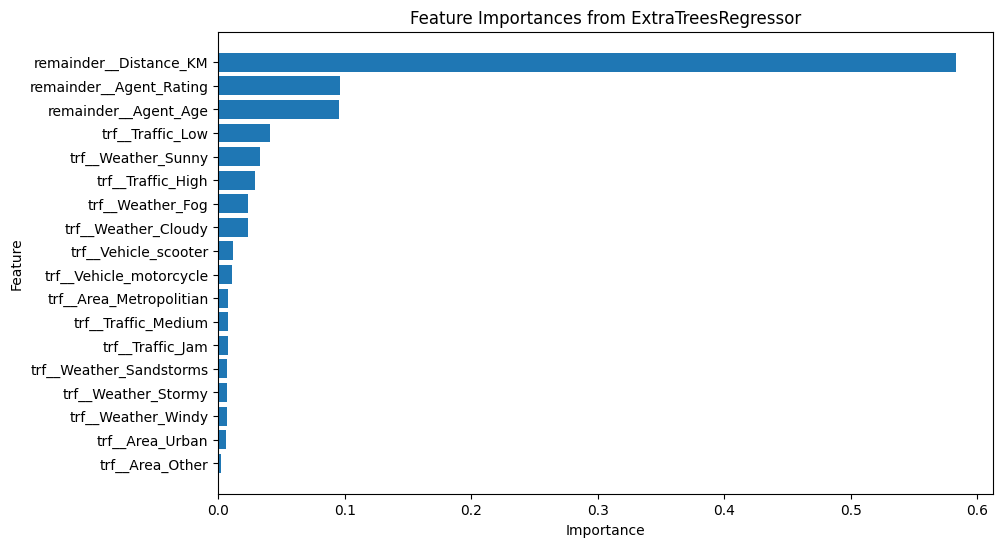

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
er_imp= Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('extra',ExtraTreesRegressor())
])
er_imp.fit(train, test)

extra_trees = er_imp.named_steps['extra']

feature_importances = extra_trees.feature_importances_

transformed_feature_names = er_imp.named_steps['encoding'].get_feature_names_out()

feature_importances_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from ExtraTreesRegressor')
plt.gca().invert_yaxis()
plt.show()

In [32]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=2)
x_train.shape,x_test.shape

((16646, 7), (4162, 7))

In [33]:
def regression_evaluation(y_pred):
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    
    plt.figure(figsize=(9,5))
    plt.subplot(2,2,1)
    sns.scatterplot(x=y_test, y=y_pred,edgecolor=(0,0,0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    
    plt.subplot(2,2,2)
    sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    
    residuals = y_test - y_pred
    plt.subplot(2,2,3)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    
    plt.tight_layout()
    plt.show()

Mean Absolute Error (MAE): 0.78
Mean Squared Error (MSE): 1.08
Root Mean Squared Error (RMSE): 1.04
R-squared (R²): 0.57


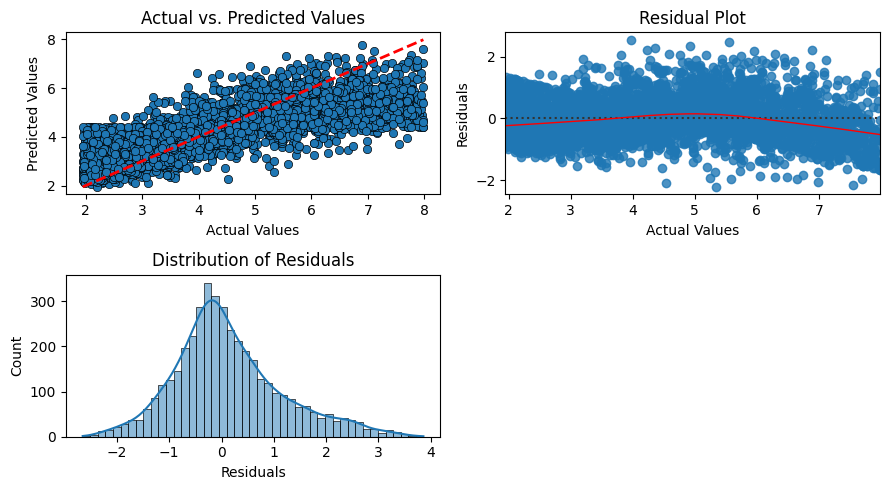

In [122]:
rbf_kernel_svm_reg = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('svm_clf',SVR(kernel='rbf',gamma=5,C=1))
])
rbf_kernel_svm_reg.fit(x_train,y_train)

y_pred = rbf_kernel_svm_reg.predict(x_test)
regression_evaluation(y_pred)

Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.72
Root Mean Squared Error (RMSE): 0.85
R-squared (R²): 0.72


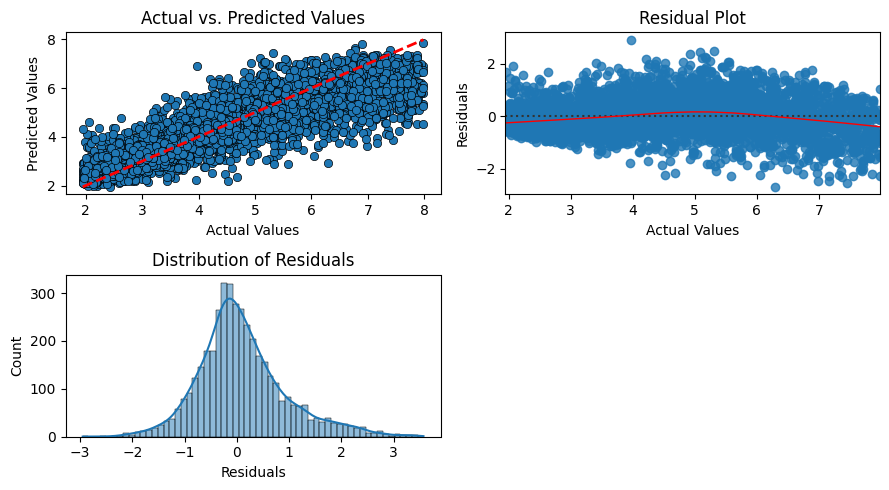

In [34]:
rbf_kernel_svm_reg_grid = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('svm_clf',SVR())
])
param_grid = {
    'svm_clf__gamma': [ 1, 5, 10],
    'svm_clf__C': [0.1, 1, 10]
}

# Perform grid search
grid_search_svm = GridSearchCV(rbf_kernel_svm_reg_grid, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_

# Make predictions
y_pred = best_model_svm.predict(x_test)
regression_evaluation(y_pred)

In [35]:
import pickle
file= open('svm_model.pkl','wb')
pickle.dump(best_model_svm,file)
file.close()

In [49]:
# input_df = pd.DataFrame({'Agent_Age':[37],'Agent_Rating':[4.9],'Distance_KM':[3.25],
#                              'Weather':['Stormy'],'Traffic':['Jam'],'Vehicle':['motorcycle'],'Area':['Urban']})
# y_pred1=best_model_svm.predict(input_df)
# (3.25/y_pred1)*60
print(y_pred[:10])
print(y_test[:10])


[3.65726022 3.86565381 5.72620765 2.18186438 3.96251789 4.94393376
 5.45319318 5.09731644 2.5269817  4.61613477]
7166     3.257690
1036     3.431084
13119    5.181405
9881     2.596624
13175    3.621783
7496     7.017127
17525    5.411855
4653     5.960157
9783     2.661238
6578     5.246377
Name: speed, dtype: float64


{'svm_clf__C': 1, 'svm_clf__gamma': 1}

In [54]:
bag_reg = BaggingRegressor(
    estimator=RandomForestRegressor(),n_estimators=750,
    max_samples=100,bootstrap=True,n_jobs=-1
)
bag_reg_pipe = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('bag_clf',bag_reg)
])
param_grid = {
   'bag_clf__n_estimators': [500, 750],  # Number of base estimators in the ensemble
    'bag_clf__estimator__max_depth': [ 10, 20],  # Max depth of the base estimator (RandomForestRegressor)
    'bag_clf__estimator__min_samples_split': [2, 5],  # Min samples required to split a node
    'bag_clf__estimator__min_samples_leaf': [ 2, 4]  # Min samples required at each leaf node
}

# Perform grid search
grid_search_bagg = GridSearchCV(bag_reg_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_bagg.fit(x_train, y_train)

# Best parameters and model
best_params = grid_search_bagg.best_params_
best_model_bagg = grid_search_bagg.best_estimator_

# Make predictions
y_pred = best_model_bagg.predict(x_test)
regression_evaluation(y_pred,bag_reg_pipe,"bag_clf")

In [36]:
log_reg = ElasticNet()
rnd_reg = RandomForestRegressor()
svm_reg = SVR()

voting_reg = VotingRegressor(estimators=[('lr',log_reg),('rf',rnd_reg),('svc',svm_reg)],
                              n_jobs=-1)
voting_reg_pipe = Pipeline([
    ('encoding',cf),
    ('scaler',StandardScaler()),
    ('voting_reg',voting_reg)
])
voting_reg_pipe.fit(x_train,y_train)
y_pred = voting_reg_pipe.predict(x_test)


TypeError: regression_evaluation() takes 1 positional argument but 3 were given

In [38]:
import pickle
file= open('voting_model.pkl','wb')
pickle.dump(voting_reg_pipe,file)
file.close()

Mean Absolute Error (MAE): 0.65
Mean Squared Error (MSE): 0.71
Root Mean Squared Error (RMSE): 0.84
R-squared (R²): 0.72


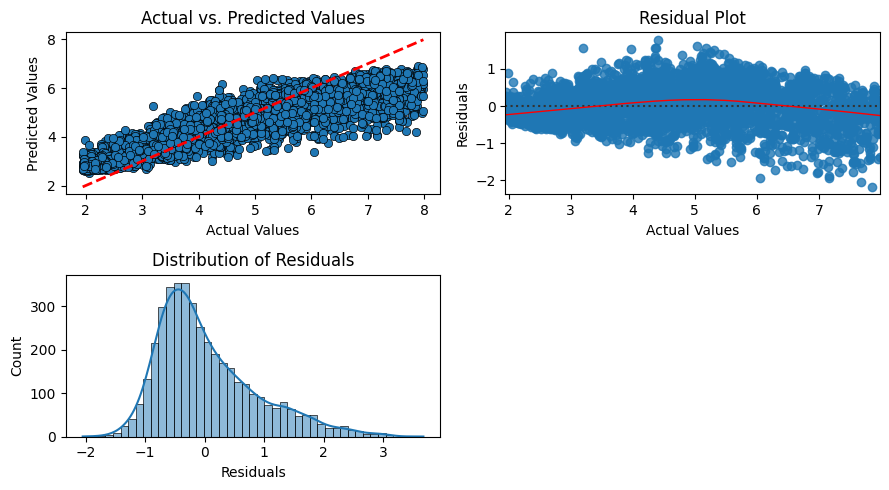

In [37]:
regression_evaluation(y_pred)

In [128]:
# 'Agent_Age','Agent_Rating','Distance_KM','Weather', 'Traffic', 'Vehicle', 'Area'
input_df = pd.DataFrame({'Agent_Age':[37],'Agent_Rating':[4.9],'Distance_KM':[3.25],
                             'Weather':['Windy'],'Traffic':['Low'],'Vehicle':['motorcycle'],'Area':['Urban']})
y_pred1=voting_reg_pipe.predict(input_df)
(3.25/y_pred1)*60

array([76.46736907])